In [82]:
import pandas as pd
import numpy as np
import seaborn as sb
import copy
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
import plotly.offline as pyo 
import plotly.graph_objs as go
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from tensorflow.keras import layers
import plotly
import plotly.express as px
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [83]:
dataset_path = keras.utils.get_file("auto-mpg.data", "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")

In [84]:
column_names = ['MPG','Cylinders','Displacement','Horsepower','Weight',
                'Acceleration', 'Model Year', 'Origin']

In [85]:
dataset = pd.read_csv(dataset_path, names=column_names,
                      na_values = "?", comment='\t',
                      sep=" ", skipinitialspace=True)

In [86]:
dataset.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [87]:
dataset.shape

(398, 8)

In [88]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           398 non-null    float64
 1   Cylinders     398 non-null    int64  
 2   Displacement  398 non-null    float64
 3   Horsepower    392 non-null    float64
 4   Weight        398 non-null    float64
 5   Acceleration  398 non-null    float64
 6   Model Year    398 non-null    int64  
 7   Origin        398 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 25.0 KB


In [89]:
dataset.describe(include = 'all')

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


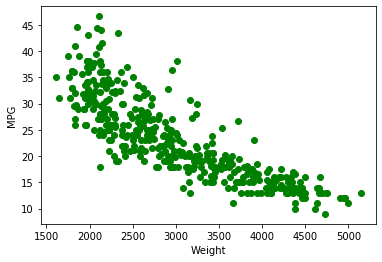

In [90]:
plt.scatter(dataset.Weight, dataset.MPG,  color ='green')
plt.xlabel("Weight")
plt.ylabel("MPG")
plt.show()

In [91]:
dataset.MPG.describe()

count    398.000000
mean      23.514573
std        7.815984
min        9.000000
25%       17.500000
50%       23.000000
75%       29.000000
max       46.600000
Name: MPG, dtype: float64

In [92]:
# min is 9, max is 46.6 and avg is 23.44 and with the variation of 7.8

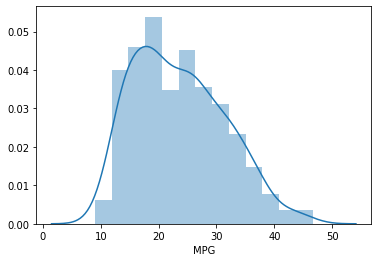

In [93]:
sns.distplot(dataset['MPG'])

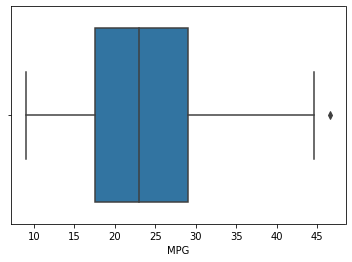

In [94]:
sns.boxplot(dataset['MPG'])

In [95]:
print("Skewness: %f" % dataset['MPG'].skew())
print("Kurtosis: %f" % dataset['MPG'].kurt())

Skewness: 0.457066
Kurtosis: -0.510781


In [96]:
dataset['Horsepower'] = pd.to_numeric(dataset['Horsepower'], errors='coerce')

In [97]:
dataset.describe().style.background_gradient()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [98]:
dataset.isnull().sum()/len(dataset)*100

MPG             0.000000
Cylinders       0.000000
Displacement    0.000000
Horsepower      1.507538
Weight          0.000000
Acceleration    0.000000
Model Year      0.000000
Origin          0.000000
dtype: float64

In [99]:
def impute_hp():
    model=LinearRegression()
    data=dataset.dropna().copy()
    X=data[["Displacement","Weight"]]
    y=data["Horsepower"]
    model.fit(X,y)
    return model
model_hp_imputer=impute_hp()

In [100]:
df_hp_cleaned=dataset[dataset["Horsepower"].isnull()]
df_hp_cleaned.loc[:,('Horsepower')]=model_hp_imputer.predict(dataset[dataset["Horsepower"].isnull()][["Displacement","Weight"]])

In [101]:
df_hp_cleaned

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
32,25.0,4,98.0,70.718583,2046.0,19.0,71,1
126,21.0,6,200.0,104.924439,2875.0,17.0,74,1
330,40.9,4,85.0,65.349078,1835.0,17.3,80,2
336,23.6,4,140.0,89.766086,2905.0,14.3,80,1
354,34.5,4,100.0,73.860317,2320.0,15.8,81,2
374,23.0,4,151.0,93.844171,3035.0,20.5,82,1


In [103]:
dataset.dropna(axis=0,inplace=True)
dataset=dataset.append(df_hp_cleaned,ignore_index=True)

mean squared error: 14.62 miles per gallon
mean abs error: 2.80 miles per gallon
r2: 0.7883450245692568


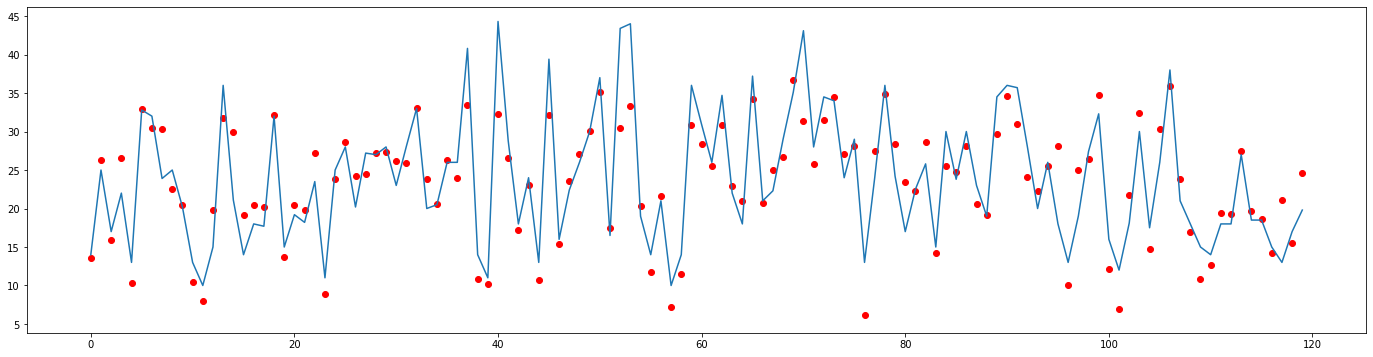

In [108]:
def baseline():
    model=LinearRegression()
    data=dataset.copy()
    X=data.drop(columns=['MPG'])
    y=data['MPG']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=69420504)
    model.fit(X_train,y_train)
    y_true=y_test
    y_pred=model.predict(X_test)
    plt.figure(figsize=(24,6))
    plt.plot(list(range(len(X_test))),y_true)
    plt.scatter(list(range(len(X_test))),y_pred,color='red',marker='o')
    print("mean squared error: {:.2f} miles per gallon".format(mean_squared_error(y_true,y_pred)))
    print("mean abs error: {:.2f} miles per gallon".format(mean_absolute_error(y_true,y_pred)))
    print("r2: {}".format(r2_score(y_true,y_pred)))
baseline()

In [55]:
dataset['USA'] = (origin == 1)*1.0
dataset['Europe'] = (origin == 2)*1.0
dataset['Japan'] = (origin == 3)*1.0
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,USA,Europe,Japan
393,27.0,4,140.0,86.0,2790.0,15.6,82,1.0,0.0,0.0
394,44.0,4,97.0,52.0,2130.0,24.6,82,0.0,1.0,0.0
395,32.0,4,135.0,84.0,2295.0,11.6,82,1.0,0.0,0.0
396,28.0,4,120.0,79.0,2625.0,18.6,82,1.0,0.0,0.0
397,31.0,4,119.0,82.0,2720.0,19.4,82,1.0,0.0,0.0


In [56]:
# Splitting the data.

train_dataset = dataset.sample(frac=0.8,random_state=0)
test_dataset = dataset.drop(train_dataset.index)

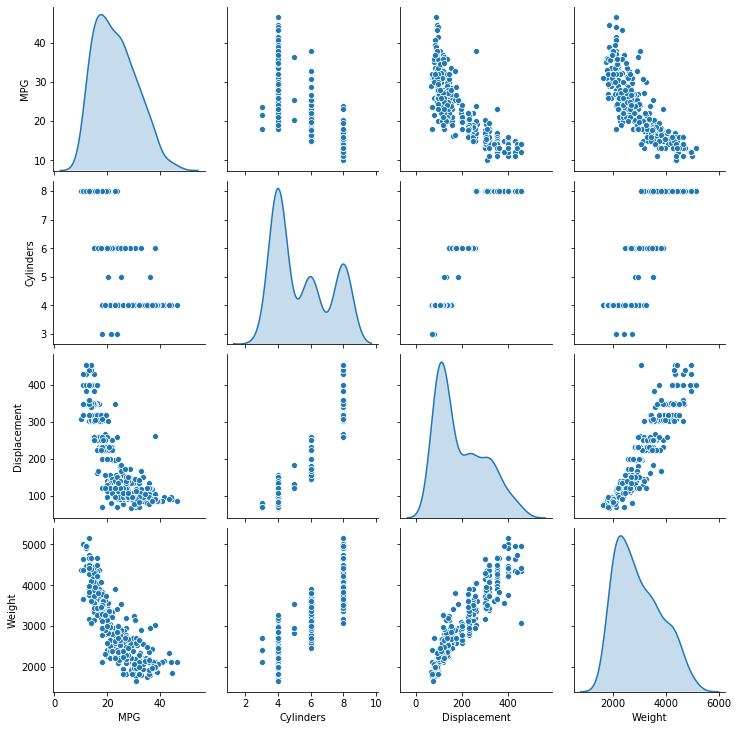

In [57]:
import seaborn as sns
sns.pairplot(train_dataset[["MPG", "Cylinders", "Displacement", "Weight"]], diag_kind="kde")

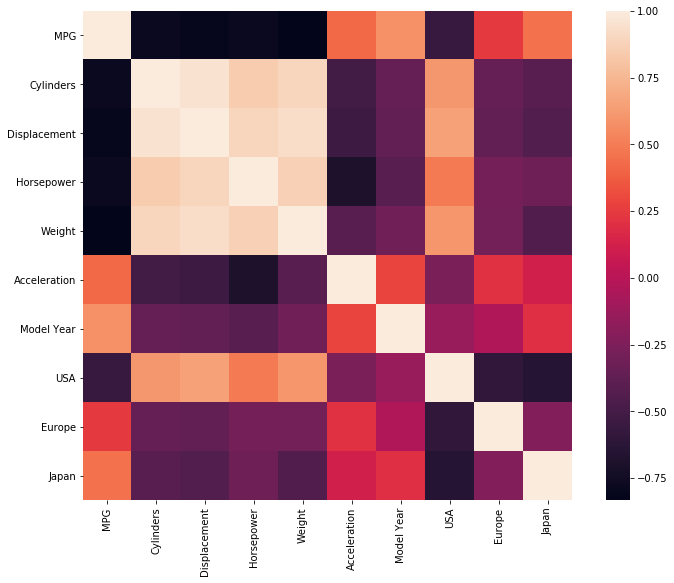

In [58]:
corrmat = dataset.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, square=True);

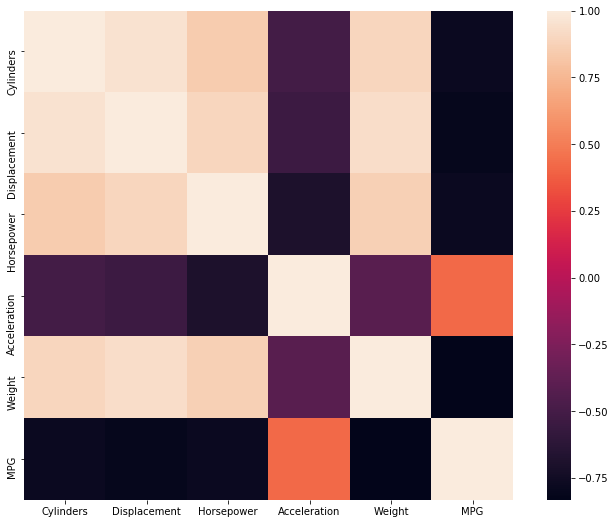

In [59]:
factors = ['Cylinders','Displacement','Horsepower','Acceleration','Weight','MPG']
corrmat = dataset[factors].corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, square=True);

In [60]:
dataset.describe(include = 'all')

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,USA,Europe,Japan
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,0.625000,0.173469,0.201531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.484742,0.379136,0.401656
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,0.000000,0.000000,0.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,0.000000,0.000000,0.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000,0.000000,0.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,1.000000,0.000000,0.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,1.000000,1.000000,1.000000


In [61]:
train_stats = train_dataset.describe()
train_stats.pop("MPG")
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
Cylinders,314.0,5.477707,1.699788,3.0,4.00,4.0,8.00,8.0
Displacement,314.0,195.318471,104.331589,68.0,105.50,151.0,265.75,455.0
Horsepower,314.0,104.869427,38.096214,46.0,76.25,94.5,128.00,225.0
Weight,314.0,2990.251592,843.898596,1649.0,2256.50,2822.5,3608.00,5140.0
Acceleration,314.0,15.559236,2.789230,8.0,13.80,15.5,17.20,24.8
Model Year,314.0,75.898089,3.675642,70.0,73.00,76.0,79.00,82.0
USA,314.0,0.624204,0.485101,0.0,0.00,1.0,1.00,1.0
Europe,314.0,0.178344,0.383413,0.0,0.00,0.0,0.00,1.0
Japan,314.0,0.197452,0.398712,0.0,0.00,0.0,0.00,1.0


In [62]:
train_labels = train_dataset.pop('MPG')
test_labels = test_dataset.pop('MPG')

In [63]:
# Normalizing the Data

def norm(x):
    return (x - train_stats['mean']) / train_stats['std']
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)

In [110]:
np.log1p(dataset).corr().style.background_gradient("Oranges")

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
MPG,1.000000,-0.820934,-0.860168,-0.849584,-0.873955,0.462241,0.573580,0.568040
Cylinders,-0.820934,1.000000,0.946320,0.830206,0.881855,-0.508330,-0.340247,-0.589125
Displacement,-0.860168,0.946320,1.000000,0.873417,0.942667,-0.522970,-0.329386,-0.682508
Horsepower,-0.849584,0.830206,0.873417,1.000000,0.874551,-0.713686,-0.395810,-0.493733
Weight,-0.873955,0.881855,0.942667,0.874551,1.000000,-0.424519,-0.281811,-0.615132
Acceleration,0.462241,-0.508330,-0.522970,-0.713686,-0.424519,1.000000,0.311842,0.230816
Model Year,0.573580,-0.340247,-0.329386,-0.395810,-0.281811,0.311842,1.000000,0.174117
Origin,0.568040,-0.589125,-0.682508,-0.493733,-0.615132,0.230816,0.174117,1.000000


In [111]:
df_log=np.log1p(dataset)

In [114]:
data=df_log
X=data.drop(columns=['MPG'])
y=data['MPG']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=69420504)

In [115]:
model=LinearRegression()
model.fit(X_train,y_train)
y_true=y_test
y_pred=model.predict(X_test)

mean squared error: 9.30 miles per gallon
mean abs error: 2.16 miles per gallon
r2: 0.893531693173204


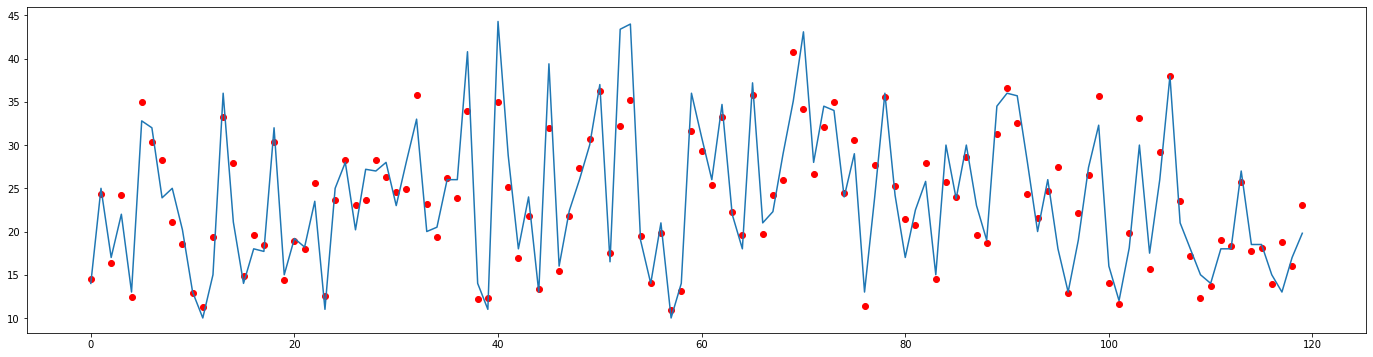

In [116]:
plt.figure(figsize=(24,6))
plt.plot(list(range(len(X_test))),np.expm1(y_true))
plt.scatter(list(range(len(X_test))),np.expm1(y_pred),color='red',marker='o')
print("mean squared error: {:.2f} miles per gallon".format(mean_squared_error(np.expm1(y_true),np.expm1(y_pred)))) # use exp(x)-1 as an inverse of log(x+1)
print("mean abs error: {:.2f} miles per gallon".format(mean_absolute_error(np.expm1(y_true),np.expm1(y_pred))))
print("r2: {}".format(r2_score(y_true,y_pred)))

In [117]:
# Building a model to find the adequate number of hidden layers, appropriate optimizer and loss functions.

def build_model():
  model = keras.Sequential([
    layers.Dense(64, activation=tf.nn.relu, input_shape=[len(train_dataset.keys())]),
    layers.Dense(64, activation=tf.nn.relu),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mean_squared_error',
                optimizer=optimizer,
                metrics=['mean_absolute_error', 'mean_squared_error'])
  return model

In [118]:
model = build_model()

In [119]:
# Inspecting the model

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 64)                640       
_________________________________________________________________
dense_13 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 65        
Total params: 4,865
Trainable params: 4,865
Non-trainable params: 0
_________________________________________________________________


In [121]:
# Now try out the model. Taking a batch of 10 examples from the training data and call model.predict on it.

example_batch = normed_train_data[:10]
example_result = model.predict(example_batch)
example_result

array([[0.073229  ],
       [0.24083878],
       [0.15837991],
       [0.2547201 ],
       [0.41692466],
       [0.01875143],
       [0.38979152],
       [0.44714805],
       [0.02628839],
       [0.32217175]], dtype=float32)

In [68]:
# It seems to be working, and it produces a result of the expected shape and type.

In [123]:
class PrintDot(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch % 100 == 0: print('')
        print('.', end = '')
        
EPOCHS = 1000

history = model.fit(
  normed_train_data, train_labels,
  epochs = EPOCHS, validation_split = 0.2, verbose=0,
  callbacks = [PrintDot()])


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..........................................................................................

In [124]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mean_absolute_error,mean_squared_error,val_loss,val_mean_absolute_error,val_mean_squared_error,epoch
995,2.478917,1.033808,2.478917,8.845819,2.285025,8.845819,995
996,2.609600,1.023505,2.609600,9.222858,2.291097,9.222858,996
997,2.716058,1.119372,2.716058,8.986431,2.338828,8.986431,997
998,2.641581,1.070519,2.641581,9.343341,2.388960,9.343341,998
999,2.583919,1.030485,2.583919,8.831468,2.279154,8.831468,999


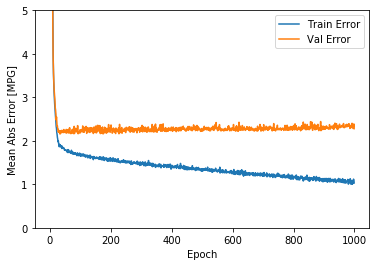

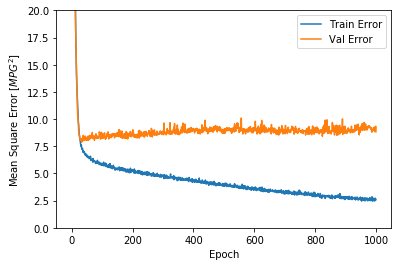

In [125]:
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch
  
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [MPG]')
  plt.plot(hist['epoch'], hist['mean_absolute_error'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mean_absolute_error'],
           label = 'Val Error')
  plt.ylim([0,5])
  plt.legend()
  
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error [$MPG^2$]')
  plt.plot(hist['epoch'], hist['mean_squared_error'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mean_squared_error'],
           label = 'Val Error')
  plt.ylim([0,20])
  plt.legend()
  plt.show()


plot_history(history)


.....................................................

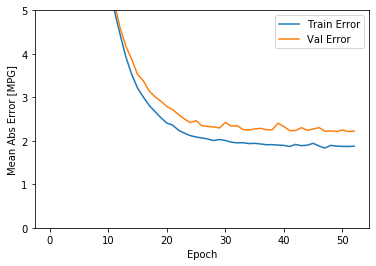

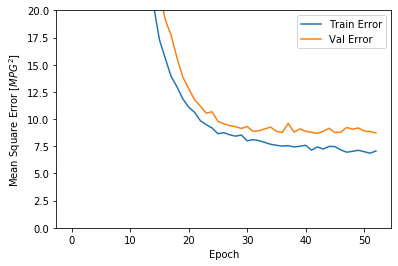

In [126]:
model = build_model()

# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(normed_train_data, train_labels, epochs=EPOCHS,
                    validation_split = 0.2, verbose=0, callbacks=[early_stop, PrintDot()])

plot_history(history)

In [127]:
loss, mae, mse = model.evaluate(normed_test_data, test_labels, verbose=0)

print("Testing set Mean Abs Error: {:5.2f} MPG".format(mae))

Testing set Mean Abs Error:  1.89 MPG


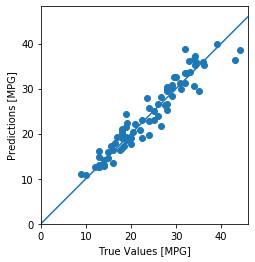

In [129]:
test_predictions = model.predict(normed_test_data).flatten()

plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])

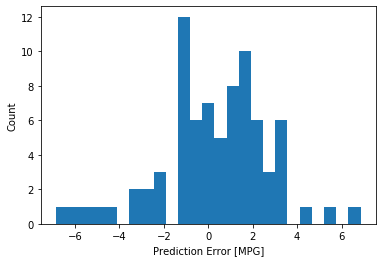

In [130]:
error = test_predictions - test_labels
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [MPG]")
_ = plt.ylabel("Count")

In [39]:
#Conclusion
#This notebook introduced a few techniques to handle a regression problem.

#Mean Squared Error (MSE) is a common loss function used for regression problems (different loss functions are used for classification problems).
#Similarly, evaluation metrics used for regression differ from classification. A common regression metric is Mean Absolute Error (MAE).
#When numeric input data features have values with different ranges, each feature should be scaled independently to the same range.
#If there is not much training data, one technique is to prefer a small network with few hidden layers to avoid overfitting.
#Early stopping is a useful technique to prevent overfitting.

SyntaxError: invalid syntax (<ipython-input-39-fe224aa7dc8b>, line 2)